In [35]:
import numpy as np
import matplotlib.pyplot as plt
import struct

# Load the hexadecimal data from the file
with open('img_hex.txt', 'r') as file:
    hex_data = file.read().replace('\n', '')

# Convert the string of hex values to a list of integers
hex_values = hex_data.split(',')
hex_values = [int(val.strip(), 16) for val in hex_values]

In [ ]:
# Convert the hexadecimal values to a numpy array
raw_bytes = np.array(hex_values, dtype=np.uint16)
image = np.zeros((len(raw_bytes), 3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    # Read 16-bit pixel
    pixel = raw_bytes[i]

    # Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) * 255 // 31
    g = ((pixel >> 5) & 0x3f) * 255 // 63
    b = (pixel & 0x1f) * 255 // 31
    image[i] = [r, g, b]

# Assuming QCIF resolution, reshape the image
image = np.reshape(image, (144, 176, 3))

# Show the image
plt.imshow(image)
plt.show()


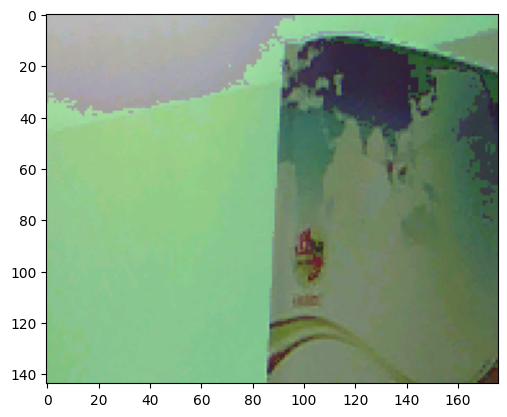

In [36]:
# Reformat the bytes into an image
# raw_bytes = np.array(hex_values, dtype="i2")
raw_bytes = np.array(hex_values, dtype=np.uint16)
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]
    # pixel = raw_bytes[i]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()